>[Import Libraries & Load The Dataset](#scrollTo=ui-hdQcRU3eh)

>[Exploratory Data Analysis (EDA)](#scrollTo=mLy66-G5VBFS)

>>[Basic Information](#scrollTo=A-_HbZyeVGbZ)

>>>[Shape](#scrollTo=JeWLMVSUWOK7)

>>>[Features](#scrollTo=OEXf_AS8WP0I)

>>[Data Cleaning](#scrollTo=VD3c8xXTEc5D)

>>>[Handling Datatypes](#scrollTo=_8EmmfpaHV-r)

>>>[Descriptions](#scrollTo=lvJnBEn8gWSa)

>>>[Type Of Features - Missing Values](#scrollTo=yQvzH2SRdiWx)

>>>[Visualizing The Correlation Between Features Using Heatmap](#scrollTo=0sz3Oy4QA2_y)

>>[Interview Duration Feature](#scrollTo=o2crF1IsjZsE)

>>[Degree](#scrollTo=lbXDHIy7EEiZ)

>>[Age](#scrollTo=_FnaFKA8IraC)

>>[Monthly Expences](#scrollTo=oosoGA7pcP3-)

>>[Immigrant](#scrollTo=3D-MW0cNC42y)

>>[Employed](#scrollTo=tQiFta1UTlc5)

>>[Motivator](#scrollTo=0zRk_mWLfb64)

>>[DepressionExperience](#scrollTo=QS2riry4vSWA)

>[Dimension Reduction(PCA and t-SNE)](#scrollTo=VpetmNx9i5F_)

>[Correlation of a feature](#scrollTo=-KTln7XhEpc1)

>[Study Hours based on Regions](#scrollTo=PdBVWbmmH-l8)

>[The most common reasons for Study Abroad](#scrollTo=3fYFwF_SMZPE)



# Import Libraries & Load The Dataset

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
import random
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Uni_Sem01/dataset.csv')
dataset

,Unnamed: 0.1,Unnamed: 0,InterviewDuration,Degree,StudyMotivation,Immigrant,Region,ReasonForStudyAbroad,employed,ReasonForEmployment,...,Age,Gender,SelfDescription,CaringResponsibilities,FurtherSurveysAgreement,EmailingConsent,NonAcademicInteractionsPerWeek,ShiftLearningAgreement,ResidenceRegion,MontlyExpences
0,1,1,49.50,Doctorate degree (PhD/DPhil/MD),No job I want is available without a PhD,Yes,North or Central America,NaN,No,NaN,...,28,Female,Latino/Hispanic,"Yes, to an adult(s)",Yes,Yes,57,"Yes, I would like to join the Shift Learning r...",Mexico,6500
1,2,2,28.38,Doctorate degree (PhD/DPhil/MD),I want to pursue an academic career,No,North or Central America,Lack of funding opportunities in my home count...,No,NaN,...,25,Male,South Asian,No,Yes,Yes,63,"Yes, I would like to join the Shift Learning r...",United States,2000
2,3,3,23.87,Doctorate degree (PhD/DPhil/MD),Personal interest in my subject of choice,Yes,North or Central America,NaN,No,NaN,...,26,Male,Caucasian,No,Yes,Yes,67,NaN,United States,1500
3,4,4,55.50,Doctorate degree (PhD/DPhil/MD),I want to pursue an academic career,No,North or Central America,Lack of quality PhD programmes in my home coun...,No,NaN,...,28,Male,East Asian,No,Yes,Yes,74,"Yes, I would like to join the Shift Learning r...",United States,1500
4,5,5,14.75,Doctorate degree (PhD/DPhil/MD),No job I want is available without a PhD,Yes,North or Central America,NaN,No,NaN,...,30,Male,Caucasian,No,Yes,Yes,57,"Yes, I would like to join the Shift Learning r...",United States,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,6808,6808,16.02,Doctorate degree (PhD/DPhil/MD),No job I want is available without a PhD,Yes,North or Central America,NaN,No,NaN,...,33,Female,South Asian,No,Yes,Yes,55,NaN,United States,2500
6808,6809,6809,13.45,Doctorate degree (PhD/DPhil/MD),I want to pursue an academic career,Yes,North or Central America,NaN,No,NaN,...,29,Female,Caucasian,No,Yes,Yes,34,"Yes, I would like to join the Shift Learning r...",United States,8500
6809,6810,6810,20.88,Doctorate degree (PhD/DPhil/MD),I wanted to live in another country,No,Europe,Lack of funding opportunities in my home count...,No,NaN,...,32,Male,Caucasian,No,Yes,No,54,NaN,Germany,2000
6810,6811,6811,130.75,Doctorate degree (PhD/DPhil/MD),Personal interest in my subject of choice,Yes,North or Central America,NaN,No,NaN,...,34,Male,Caucasian,No,Yes,Yes,72,"Yes, I would like to join the Shift Learning r...",United States,8000


# Exploratory Data Analysis (EDA)

## Basic Information

### Shape

In [ ]:
dataset.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)

In [ ]:
print(f"The dataset has: {dataset.shape[0]} rows and {dataset.shape[1]} columns(features)")

The dataset has: 6812 rows and 52 columns(features)


### Features

In [ ]:
dataset.columns

Index(['InterviewDuration', 'Degree', 'StudyMotivation', 'Immigrant', 'Region',
       'ReasonForStudyAbroad', 'employed', 'ReasonForEmployment',
       'EducationBestAspect', 'EducationSatisfaction',
       'ExperienceSatisfaction', 'SatisfactionImprovement',
       'FinancialSupports', 'CareerSatisfaction', 'ExpectationsMet',
       'StudyHours', 'SupervisorMeetingDuration', 'OverallExperience',
       'DepartmentPositiveImpact', 'EnxietyExperience', 'MentalHelpSeek',
       'NeedForNightWork', 'DepressionExperience', 'Motivator',
       'DiscriminationExperience', 'DiscriminationType',
       'MentalHealthPriority', 'DesireForResearch', 'ReasonsForQuit',
       'DesiredJob', 'DesiredEnvironment', 'ExpectedTimeToEmploy', 'PostDoc',
       'ReasonsForResearch', 'ReasonsForStudy', 'Challenges',
       'SuggestedResources', 'BudgetManagement', 'EducationUsefulness',
       'Activities', 'ProfessionalNetwork', 'Suggestions', 'Age', 'Gender',
       'SelfDescription', 'CaringResponsibilit

## Data Cleaning

In [ ]:
level_of_satisfaction = {
    "4 = Neither satisfied nor dissatisfied": 4,
    "7 = Extremely satisfied": 7,
    "1 = Not at all satisfied": 1,
    "2": 2,
    "3": 3,
    "5": 5,
    "6": 6,
    "": ""
}

def between_11_and_80(input):
    if input == "More than 80 " or input == "More than 80":
        return 100

    if input == "Less than 11 " or input == "Less than 11":
        return 0

    else:
        return float(input)


dataset['ExperienceSatisfaction'] = dataset['ExperienceSatisfaction'].map(level_of_satisfaction)
dataset['CareerSatisfaction'] = dataset['CareerSatisfaction'].map(level_of_satisfaction)

for i in range(dataset.shape[0]):
    dataset['FinancialSupports'][i] = between_11_and_80(dataset['FinancialSupports'][i])
    dataset['StudyHours'][i] = between_11_and_80(dataset['StudyHours'][i])
    dataset['NonAcademicInteractionsPerWeek'][i] = between_11_and_80(dataset['NonAcademicInteractionsPerWeek'][i])


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset['NonAcademicInteractionsPerWeek'][i] = between_11_and_80(dataset['NonAcademicInteractionsPerWeek'][i])
<ipython-input-7-72ed989d56a9>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['NonAcademicInteractionsPerWeek'][i] = between_11_and_80(dataset['NonAcademicInteractionsPerWeek'][i])
<ipython-input-7-72ed989d56a9>:27: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update 

### Handling Datatypes

In [ ]:
dataset["Age"] = pd.to_numeric(dataset["Age"], errors='coerce')
dataset["ExperienceSatisfaction"] = pd.to_numeric(dataset["ExperienceSatisfaction"], errors='coerce')
dataset["CareerSatisfaction"] = pd.to_numeric(dataset["CareerSatisfaction"], errors='coerce')
dataset["FinancialSupports"] = pd.to_numeric(dataset["FinancialSupports"], errors='coerce')
dataset["StudyHours"] = pd.to_numeric(dataset["StudyHours"], errors='coerce')
dataset["NonAcademicInteractionsPerWeek"] = pd.to_numeric(dataset["NonAcademicInteractionsPerWeek"], errors='coerce')

### Descriptions

In [ ]:
temp_table = dataset[["InterviewDuration", "MontlyExpences", "ExperienceSatisfaction" ,"Age", "CareerSatisfaction", "FinancialSupports", "StudyHours", "NonAcademicInteractionsPerWeek"]]
temp_table.dropna(axis=0, inplace=True)
temp_table.describe()

<ipython-input-9-23a6e5fdc6f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_table.dropna(axis=0, inplace=True)


,InterviewDuration,MontlyExpences,ExperienceSatisfaction,Age,CareerSatisfaction,FinancialSupports,StudyHours,NonAcademicInteractionsPerWeek
count,6625.000000,6625.000000,6625.000000,6625.000000,6625.000000,6625.000000,6625.000000,6625.000000
mean,926.249535,4709.856604,4.882717,29.893132,3.656604,50.056755,50.056755,50.056755
std,5048.618385,2298.946486,1.470825,6.555600,1.756276,20.716078,20.716078,20.716078
min,4.630000,1000.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000
25%,17.320000,2500.000000,4.000000,26.000000,2.000000,41.000000,41.000000,41.000000
50%,24.170000,4500.000000,5.000000,29.000000,4.000000,50.000000,50.000000,50.000000
75%,37.170000,6500.000000,6.000000,33.000000,5.000000,60.000000,60.000000,60.000000
max,44415.350000,8800.000000,7.000000,123.000000,7.000000,100.000000,100.000000,100.000000


### Type Of Features - Missing Values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   InterviewDuration               6812 non-null   float64
 1   Degree                          6812 non-null   object 
 2   StudyMotivation                 6812 non-null   object 
 3   Immigrant                       6812 non-null   object 
 4   Region                          6812 non-null   object 
 5   ReasonForStudyAbroad            2459 non-null   object 
 6   employed                        6812 non-null   object 
 7   ReasonForEmployment             1326 non-null   object 
 8   EducationBestAspect             6812 non-null   object 
 9   EducationSatisfaction           6812 non-null   object 
 10  ExperienceSatisfaction          6812 non-null   int64  
 11  SatisfactionImprovement         6812 non-null   object 
 12  FinancialSupports               68

 - `ReasonsForQuit has the highest amount of missing value`

### Visualizing The Correlation Between Features Using Heatmap

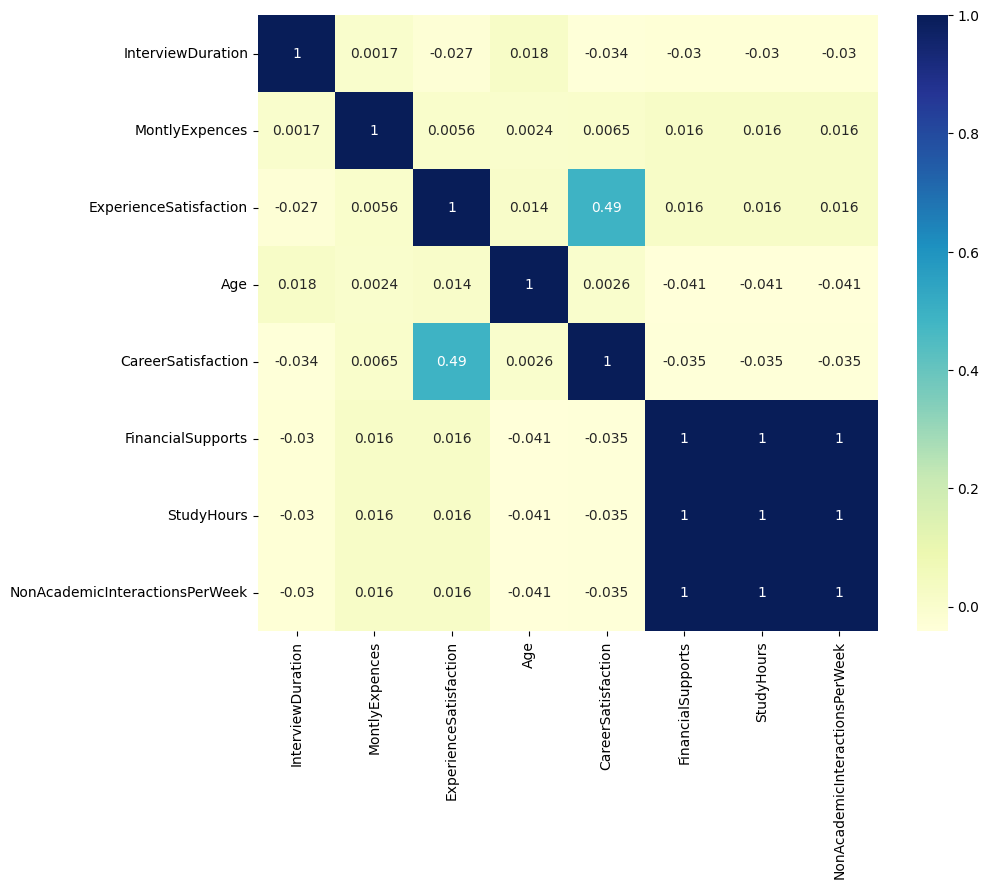

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(temp_table.corr(), annot=True, cmap="YlGnBu")
plt.show()

 - `We can see that FinancialSupport, StudyHours, and NonAcademicInteractionPerWeek are the same and have correlation 1. (It's not normal at all)`

## Interview Duration Feature

In [ ]:
temp_list = dataset['InterviewDuration']

In [ ]:
print("Before and After dropping null values")
print(f"Before: {len(temp_list)}, After: {len(temp_list.dropna())}")

Before and After dropping null values
Before: 6812, After: 6812


- `1) This feature doesn't have any null value `

In [ ]:
print(f"Mean: {stat.mean(temp_list)}, Mid: {stat.median(temp_list)}, STD: {stat.stdev(temp_list)}")
print(f"Min: {np.min(temp_list)}, Max: {np.max(temp_list)}")

Mean: 964.2552040516736, Mid: 24.18, STD: 5164.968882830437
Min: 4.63, Max: 44415.35


- Mean, Middle, and Standard Deviation (Differ from pandas describe function because statistics uses sampling)

- `2) Mean and median have very different values. I guess this is because of the outliers. Let's find it out`

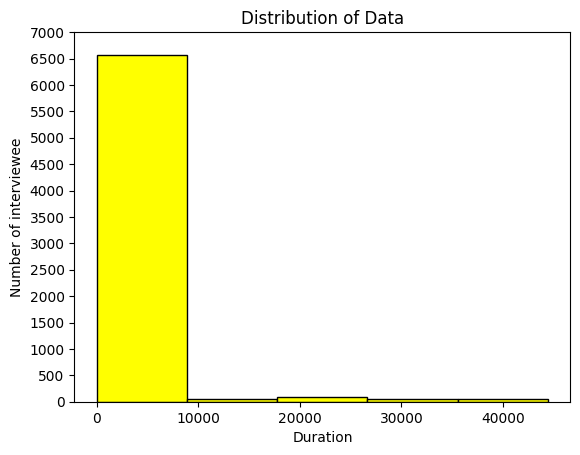

In [ ]:
plt.hist(temp_list, bins=5, color='yellow', edgecolor='black')
plt.title('Distribution of Data')
plt.yticks(np.arange(0, 7001, 500))
plt.xlabel('Duration')
plt.ylabel('Number of interviewee')
plt.show()

In [ ]:
percentage = 100 - (((6812-6500)/6812) * 100)
percentage

95.41984732824427

 - `3) Almost 6500 (out of 6812) participants, which is over 95%, were interviewed in less than 10,000 units of time(second or minute). The other 5% is very out of the normal distribution(probably this is the reason for a high STD), so let's remove them temporarily.`

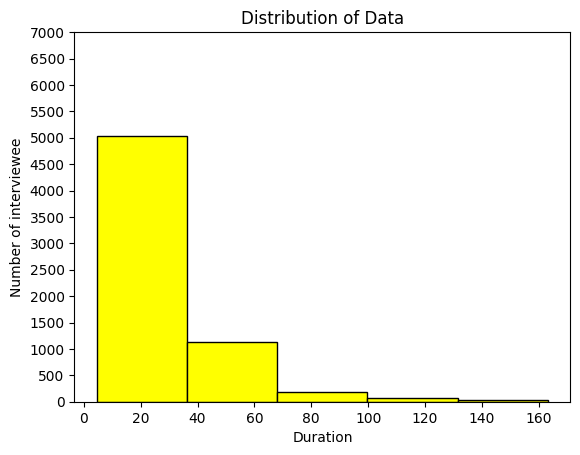

In [ ]:
sorted_data = sorted(temp_list)
cutoff = int(len(sorted_data) * 0.95)
result = sorted_data[:cutoff]

plt.hist(result, bins=5, color='yellow', edgecolor='black')
plt.title('Distribution of Data')
plt.yticks(np.arange(0, 7001, 500))
plt.xlabel('Duration')
plt.ylabel('Number of interviewee')
plt.show()

In [ ]:
percentage = 100 - (((cutoff-5000)/cutoff) * 100)
percentage

77.26781023025808

 - `Over 77% of the first 95% of InterviewDuration have less than 40 units of time(just compare to 1000)` :))))))))

 - `We understood the reason for the high STD and the huge difference between the mean and median.`

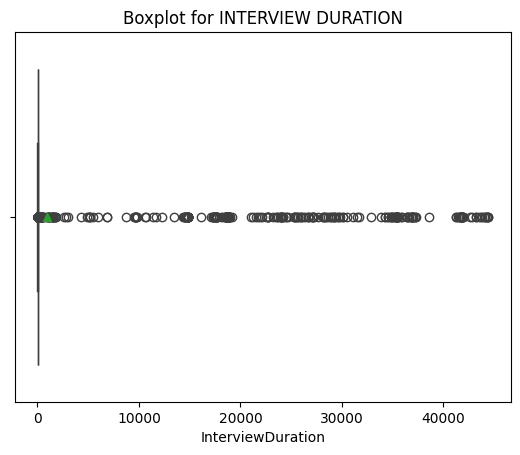

In [ ]:
sns.boxplot(temp_list, orient='h', showmeans=True)
plt.title("Boxplot for INTERVIEW DURATION")
plt.show()

- The variance is too high so let's try a random sample.

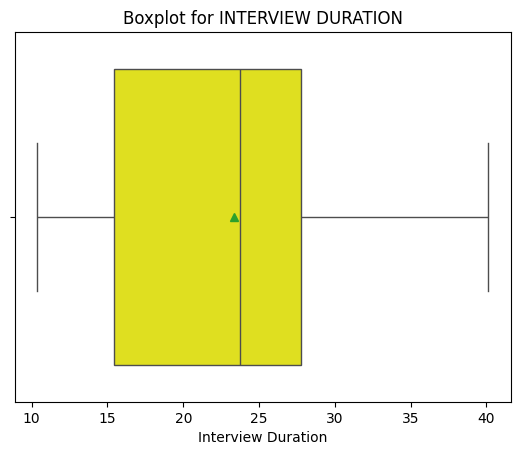

In [ ]:
shorted_list = random.sample(list(result), 20)
sns.boxplot(shorted_list, orient='h', showmeans=True, color='yellow')
plt.title("Boxplot for INTERVIEW DURATION")
plt.xlabel("Interview Duration")
plt.show()

- The boxplot is showing the IQR, mean, and other features of the 20 random data points.

 My Approach For Handling Outliers.

- `1) Removing outliers from the dataset: As the percentage of outliers is relatively low, we can remove them from the dataset.`
- `2) Mapping outliers to the median or mean of the sample: Not a good option because median and mean are so different`
- `3) Mapping outliers to a specific value so that reduce their impact.`
- `4) Transfer data: Using LOG or similar functions that reduce the impact of outliers.`

## Degree

In [ ]:
degree = dataset['Degree']
degree

,Degree
0,Doctorate degree (PhD/DPhil/MD)
1,Doctorate degree (PhD/DPhil/MD)
2,Doctorate degree (PhD/DPhil/MD)
3,Doctorate degree (PhD/DPhil/MD)
4,Doctorate degree (PhD/DPhil/MD)
...,...
6807,Doctorate degree (PhD/DPhil/MD)
6808,Doctorate degree (PhD/DPhil/MD)
6809,Doctorate degree (PhD/DPhil/MD)
6810,Doctorate degree (PhD/DPhil/MD)


In [ ]:
print("Before and After dropping null values")
print(f"Before: {len(degree)}, After: {len(degree.dropna())}")

Before and After dropping null values
Before: 6812, After: 6812


 - `This feature doesn't have any null values`

Text(0, 0.5, 'Number of interviewee')

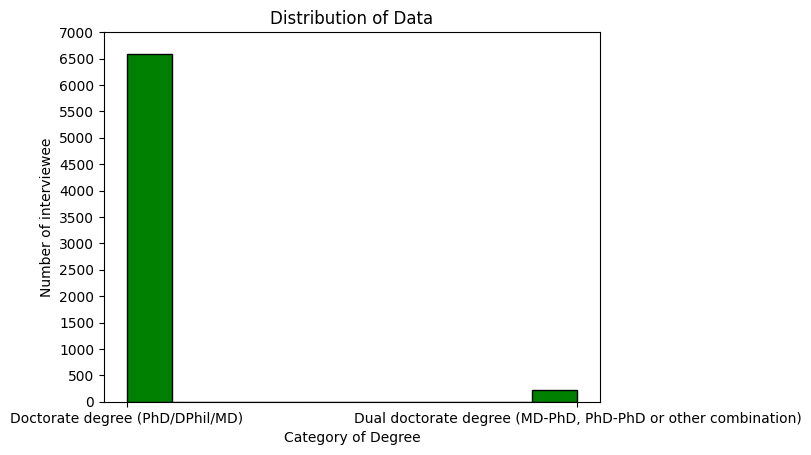

In [ ]:
plt.hist(degree, color='green', edgecolor='black')
plt.title('Distribution of Data')
plt.yticks(np.arange(0, 7001, 500))
plt.xlabel('Category of Degree')
plt.ylabel('Number of interviewee')

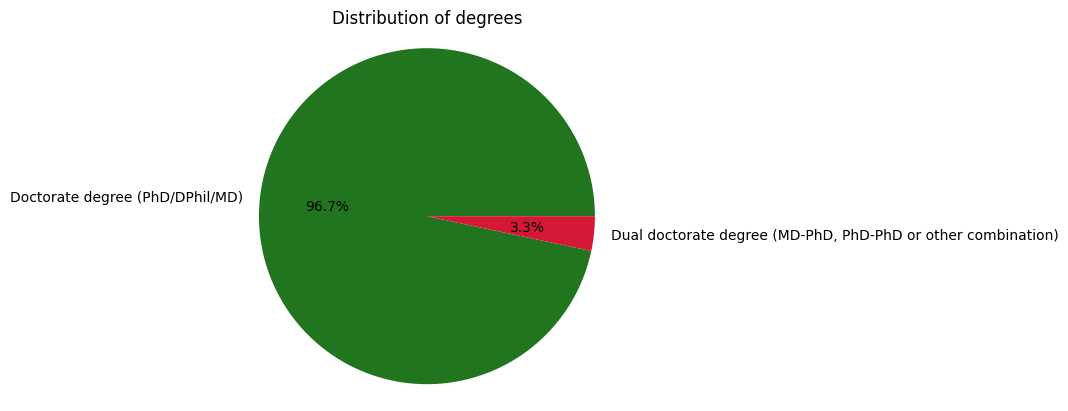

In [ ]:
counter = Counter(degree)

labels = list(counter.keys())
count = list(counter.values())

plt.pie(count, labels=labels, colors=['#21751e', "#d61837"], autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Distribution of degrees')
plt.show()

`Something caught my eye. I realized that the number of participants with a Doctorate Degree and those whose interviews took less than 1000 units of time are pretty much the same. I want to check whether Dual Doctorate participants took interviews of more than 1000 units.`

Text(0, 0.5, 'Number of interviewee')

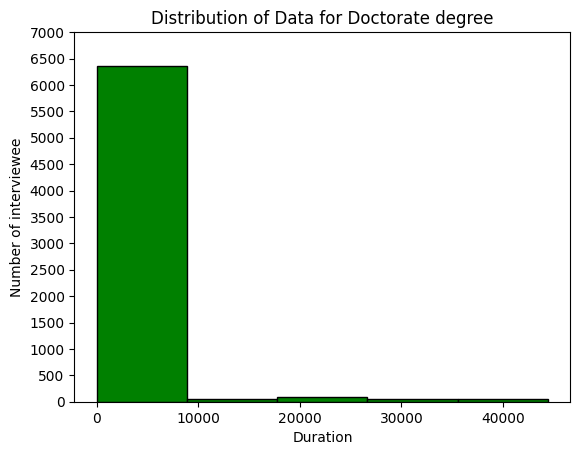

In [ ]:
temp_list = dataset[dataset['Degree']=="Doctorate degree (PhD/DPhil/MD)"]
temp_list = temp_list['InterviewDuration']
plt.hist(temp_list, bins=5, color='green', edgecolor='black')
plt.title('Distribution of Data for Doctorate degree')
plt.yticks(np.arange(0, 7001, 500))
plt.xlabel('Duration')
plt.ylabel('Number of interviewee')

`That was not correct.`


 - `Again over 95% of participants have just one degree(The distribution of all participants and Doctorate degree (PhD/DPhil/MD) are the same)`

Text(0, 0.5, 'Number of interviewee')

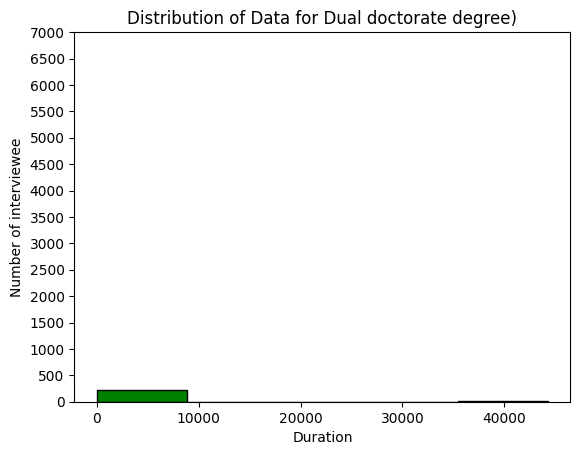

In [ ]:
temp_list = dataset[dataset['Degree']=="Dual doctorate degree (MD-PhD, PhD-PhD or other combination)"]
temp_list = temp_list['InterviewDuration']
plt.hist(temp_list, bins=5, color='green', edgecolor='black')
plt.title('Distribution of Data for Dual doctorate degree)')
plt.yticks(np.arange(0, 7001, 500))
plt.xlabel('Duration')
plt.ylabel('Number of interviewee')

`This category(Daul Doctorate) doesn't have a normal distribution as well.`





In [ ]:
print(f"The number of {labels[0]} is {count[0]}, and the number of {labels[1]} is {count[1]}.")

The number of Doctorate degree (PhD/DPhil/MD) is 6586, and the number of Dual doctorate degree (MD-PhD, PhD-PhD or other combination) is 226.


`96.7% of participants have Doctorate (PhD/DPhil/MD) degree and the others(3.3%) have Dual Doctrate degree.`

## Age

`We converted the 'prefer not to say' and '65 or older' to Null values because they didn't give us any exact data.`

In [ ]:
age = dataset['Age']
age

,Age
0,28.0
1,25.0
2,26.0
3,28.0
4,30.0
...,...
6807,33.0
6808,29.0
6809,32.0
6810,34.0


In [ ]:
print(f"Mean: {stat.mean(age.dropna())}, Mid: {stat.median(age.dropna())}, STD: {stat.stdev(age.dropna())}")

Mean: 29.885853514471354, Mid: 29.0, STD: 6.570373446907329


`There is no significant difference between the mean and median(There is no outliers)`

In [ ]:
print("Before and After dropping null values")
print(f"Before: {len(age)}, After: {len(age.dropna())}")
print(f"There are {len(age) - len(age.dropna())} NULL values which are 'prefer not to say' and '65 or older' because they don't have any precise detail")

Before and After dropping null values
Before: 6812, After: 6772
There are 40 NULL values which are 'prefer not to say' and '65 or older' because they don't have any precise detail


In [ ]:
age = age.dropna()

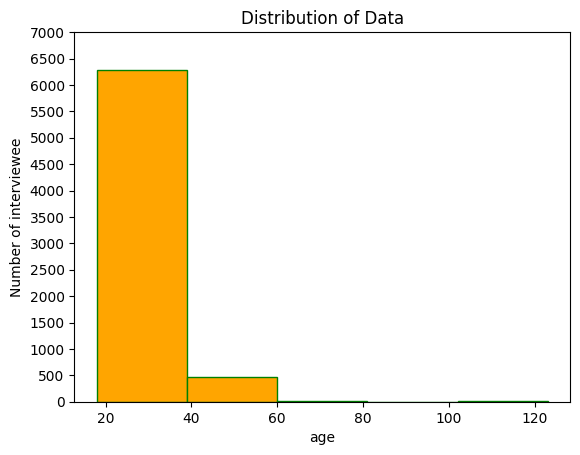

In [ ]:
plt.hist(age, bins=5, color='orange', edgecolor='green')
plt.title('Distribution of َAge')
plt.yticks(np.arange(0, 7001, 500))
plt.xlabel('age')
plt.ylabel('Number of interviewee')
plt.show()

In [ ]:
print(f"{ round((len(age[age <= 60]) / len(age)) * 100, 2) }% of participants have age lower than 60 which is: {len(age[age <= 60])}")

99.65% of participants have age lower than 60 which is: 6748


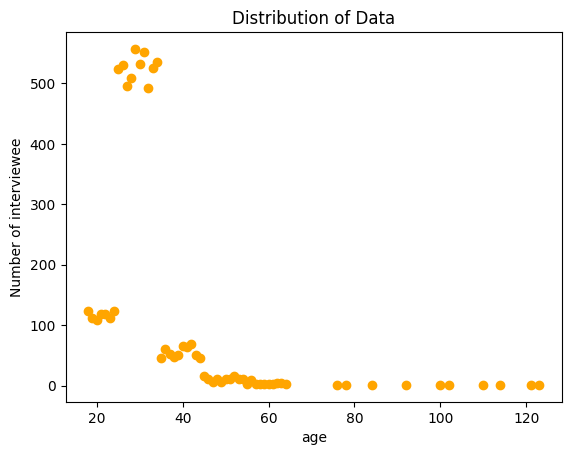

In [ ]:
count = Counter(age)

labels = list(count.keys())
value = list(count.values())

plt.scatter(labels, value, color='orange')
plt.title('Distribution of Data')
plt.xlabel('age')
plt.ylabel('Number of interviewee')
plt.show()

In [ ]:
print(f"Number of participants with age higher than 60 are: {len(age[age >= 60])}")
print(f"Number of participants with age higher than 80 are: {len(age[age >= 80])}")
print(f"Number of participants with age higher than 100 are: {len(age[age >= 100])}")

Number of participants with age higher than 60 are: 27
Number of participants with age higher than 80 are: 8
Number of participants with age higher than 100 are: 6


`So how can we figure out which data points are outliers? What is the threshold? let's find out by using IQR`

In [ ]:
Q1 = age.quantile(0.25)
Q3 = age.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = age[ (age > upper_bound) | (age < lower_bound)]

In [ ]:
print(f"The threshold for outlier in this case is: {min(outliers)} and there are {len(outliers)} data points that are outliers")

The threshold for outlier in this case is: 44.0 and there are 199 data points that are outliers


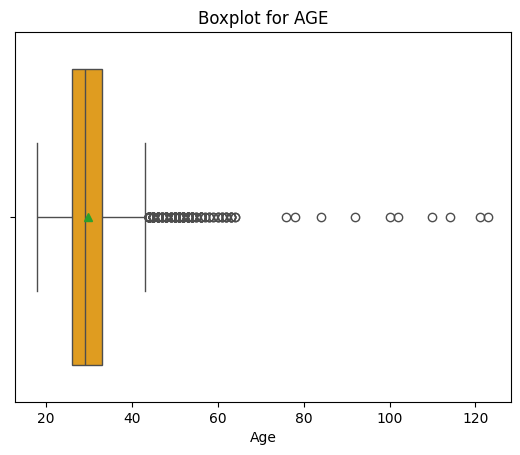

In [ ]:
sns.boxplot(age, orient='h', showmeans=True, color='orange')
plt.title("Boxplot for AGE")
plt.show()

`Like us, the SNS.boxplot function considered 44 as the threshold for outliers.`

In [ ]:
temp_list = age[age < upper_bound]
temp_list = temp_list[temp_list > lower_bound]
print(f"Mean: {stat.mean(temp_list)}, Mid: {stat.median(age)}, STD: {stat.stdev(temp_list)}")

Mean: 29.20066940514225, Mid: 29.0, STD: 4.855243525490395


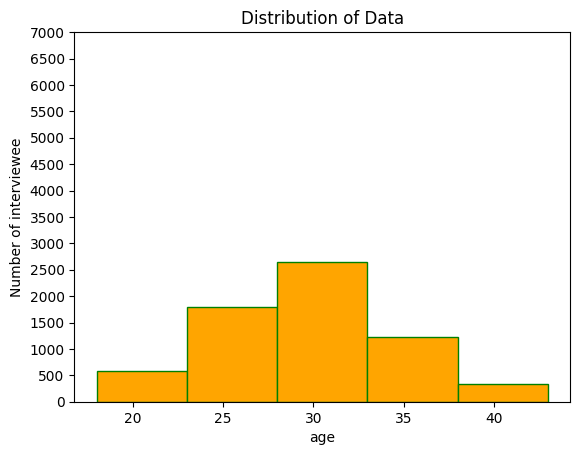

In [ ]:
plt.hist(temp_list, bins=5, color='orange', edgecolor='green')
plt.title('Distribution of Data')
plt.yticks(np.arange(0, 7001, 500))
plt.xlabel('age')
plt.ylabel('Number of interviewee')
plt.show()

`For standard range of data the midean and mean are the same and the distribution is like normal distribution.`

`Now we want to answer some questions about age`

- `Question 1:` What is the average age for men and women?

In [ ]:
male = dataset[dataset['Gender'] == 'Male']
male_avg_age = male['Age'].mean()

female = dataset[dataset['Gender'] == 'Female']
female_avg_age = female['Age'].mean()

In [ ]:
print(f"The average age for Male is: {round(male_avg_age, 2)}, and for Female is: {round(female_avg_age, 2)}")

The average age for Male is: 30.27, and for Female is: 29.49


`Almost the same`

`Question 2:` What is the average age for Doctrate and Dual Doctrate degree?

In [ ]:
doc = dataset[dataset['Degree'] == 'Doctorate degree (PhD/DPhil/MD)']
doc_avg_age = doc['Age'].mean()

dual_doc = dataset[dataset['Degree'] == 'Dual doctorate degree (MD-PhD, PhD-PhD or other combination)']
dual_doc_avg_age = dual_doc['Age'].mean()

In [ ]:
print(f"The average age for Docs is: {round(doc_avg_age, 2)}, and for Dual Docs is: {round(dual_doc_avg_age, 2)}")

The average age for Docs is: 29.86, and for Dual Docs is: 30.76


`Almost the same`

`Question 3:` Is there any relation between age and study motivation? I want to figure out if age affects study motivation.

In [ ]:
avg_age_per_reason = dataset.groupby('StudyMotivation')['Age'].mean()
avg_age_per_reason

,Age
StudyMotivation,
I want to pursue a non-academic career,29.016241
I want to pursue an academic career,30.038976
I wanted to continue pursuing my research,29.989505
I wanted to live in another country,29.992248
No job I want is available without a PhD,29.260274
"Other, please specify",30.208589
Personal interest in my subject of choice,30.011103


`There is no difference`

## Monthly Expenses

In [ ]:
monthly_expence = dataset['MontlyExpences']
monthly_expence

,MontlyExpences
0,6500
1,2000
2,1500
3,1500
4,6000
...,...
6807,2500
6808,8500
6809,2000
6810,8000


In [ ]:
print(f"Mean: {stat.mean(monthly_expence.dropna())}, Mid: {stat.median(monthly_expence.dropna())}, STD: {stat.stdev(monthly_expence.dropna())}")
print(f"Min: {np.min(monthly_expence.dropna())}, and Max: {np.max(monthly_expence.dropna())}")

Mean: 4715.957134468585, Mid: 4500.0, STD: 2300.197417031109
Min: 1000, and Max: 8800


`There is no a significant differences between mean and midean`

In [ ]:
print("Before and After dropping null values")
print(f"Before: {len(monthly_expence)}, After: {len(monthly_expence.dropna())}")
print(f"There are {len(monthly_expence) - len(monthly_expence.dropna())} NULL values")

Before and After dropping null values
Before: 6812, After: 6812
There are 0 NULL values


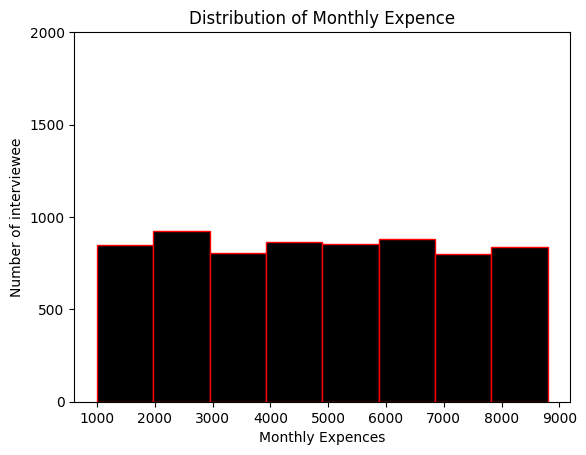

In [ ]:
plt.hist(monthly_expence, bins=8, color='black', edgecolor='red')
plt.title('Distribution of Monthly Expence')
plt.yticks(np.arange(0, 2001, 500))
plt.xlabel('Monthly Expences')
plt.ylabel('Number of interviewee')
plt.show()

<ipython-input-50-5df30743ebca>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(monthly_expence, shade=True, color="black", edgecolor='red')


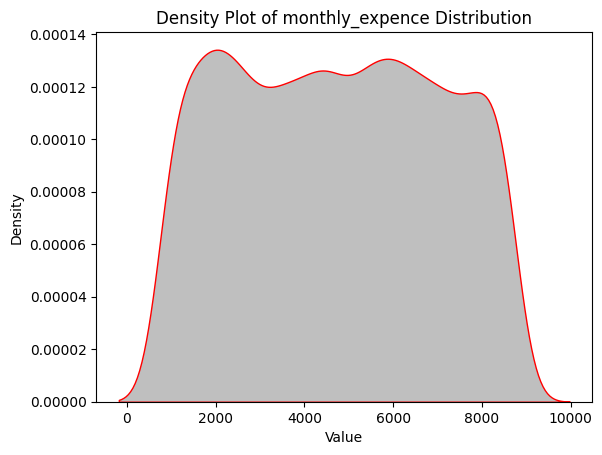

In [ ]:
sns.kdeplot(monthly_expence, shade=True, color="black", edgecolor='red')
plt.title('Density Plot of monthly_expence Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

`Monthly expence have uniform distribution`

Let's check outliers.

In [ ]:
Q1 = monthly_expence.quantile(0.25)
Q3 = monthly_expence.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"The lower bound is: {lower_bound} and the upper bound is: {upper_bound}")

The lower bound is: -3500.0 and the upper bound is: 12500.0


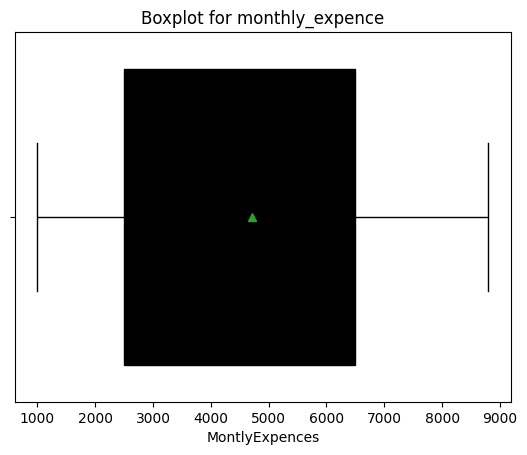

In [ ]:
sns.boxplot(monthly_expence, orient='h', showmeans=True, color='black')
plt.title("Boxplot for monthly_expence")
plt.show()

`As it's obvious, the monthly expence feature doesn't have any outlier.`

##  Immigrant

In [ ]:
immigrant = dataset['Immigrant']
immigrant

,Immigrant
0,Yes
1,No
2,Yes
3,No
4,Yes
...,...
6807,Yes
6808,Yes
6809,No
6810,Yes


In [ ]:
print("Before and After dropping null values")
print(f"Before: {len(immigrant)}, After: {len(immigrant.dropna())}")

Before and After dropping null values
Before: 6812, After: 6812


`Immigrant feature has no missing value`

Text(0, 0.5, 'Number of interviewee')

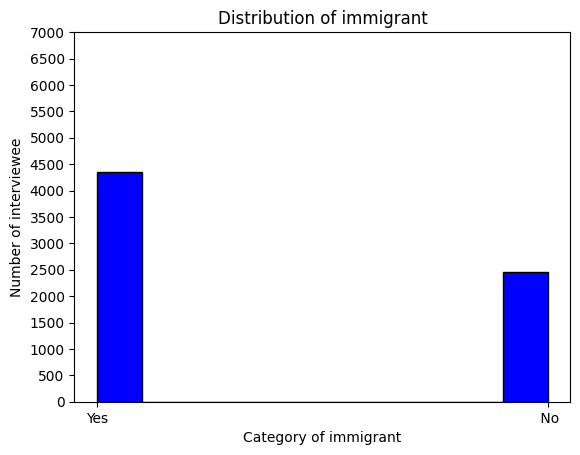

In [ ]:
plt.hist(immigrant, color='blue', edgecolor='black')
plt.title('Distribution of immigrant')
plt.yticks(np.arange(0, 7001, 500))
plt.xlabel('Category of immigrant')
plt.ylabel('Number of interviewee')

In [ ]:
percentage_of_yes = (len(immigrant[immigrant=='Yes']) / len(immigrant)) * 100
print(f"{round(percentage_of_yes, 2)}% of participants migrated which are: {len(immigrant[immigrant=='Yes'])}")

63.9% of participants migrated which are: 4353


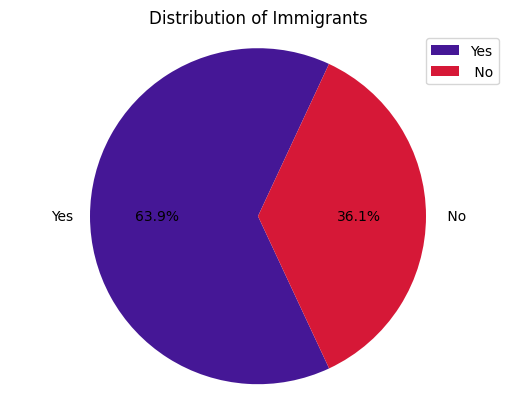

In [ ]:
counter = Counter(immigrant)

labels = list(counter.keys())
count = list(counter.values())

plt.pie(count, labels=labels, colors=['#451796', "#d61837"], autopct='%1.1f%%', startangle=65)
plt.axis('equal')
plt.legend()
plt.title('Distribution of Immigrants')
plt.show()

Let's figure out some more details about the immigrants.

`Qustion1:`  What are the study motivations for those who migrated and didn't migrate?

In [ ]:
temp_list = dataset[dataset['Immigrant'] == 'Yes']
temp_list = temp_list.groupby('StudyMotivation')['Immigrant'].count()
temp_list = temp_list.sort_values(ascending=False)
temp_list

,Immigrant
StudyMotivation,
I want to pursue an academic career,1646
Personal interest in my subject of choice,953
I wanted to continue pursuing my research,863
No job I want is available without a PhD,473
I want to pursue a non-academic career,290
"Other, please specify",103
I wanted to live in another country,25


In [ ]:
temp_list = dataset[dataset['Immigrant'] == ' No']
temp_list = temp_list.groupby('StudyMotivation')['Immigrant'].count()
temp_list = temp_list.sort_values(ascending=False)
temp_list


,Immigrant
StudyMotivation,
I want to pursue an academic career,981
Personal interest in my subject of choice,501
I wanted to continue pursuing my research,481
No job I want is available without a PhD,188
I want to pursue a non-academic career,143
I wanted to live in another country,104
"Other, please specify",61


 - `There is no difference in priority for those who want to immigrate and those who don't.`


 - Top 3 priorities:
    - `1) I want to pursue an academic career`
    - `2) Personal interest in my subject of choice	`
    - `3) I wanted to continue pursuing my research	`

`Qustion2:`  What are residence region of the immigrants?

In [ ]:
temp_list = dataset[dataset['Immigrant'] == 'Yes']
temp_list = temp_list.groupby("ResidenceRegion")['Immigrant'].count()
temp_list = temp_list.sort_values(ascending=False)
temp_list.head(5)

,Immigrant
ResidenceRegion,
United States,1049
China,680
India,513
United Kingdom,253
Germany,189


Top 3 countries which are most selected as a residence region are:
- `1) USA`
- `2) China`
- `3) India`

`Question 3:` What are the most common reasons for study abroad?

In [ ]:
temp_list = dataset[dataset['Immigrant'] == 'Yes']
temp_list = temp_list.groupby("ReasonForStudyAbroad")['Immigrant'].count()
temp_list = temp_list.sort_values(ascending=False)
temp_list

,Immigrant
ReasonForStudyAbroad,


`All the immigrants left the ReasonForStudy feature NULL.`

In [ ]:
temp_list = dataset[dataset['Immigrant'] == ' No']
temp_list = temp_list.groupby("ReasonForStudyAbroad")['Immigrant'].count()
temp_list = temp_list.sort_values(ascending=False)
temp_list.head(5)

,Immigrant
ReasonForStudyAbroad,
Lack of funding opportunities in my home country,114
Lack of quality PhD programmes in my home country,107
Chance to pursue a specific research question,99
To experience another culture,88
To study at a specific university,71


Immigrants didn't answer this question(the Reason For Study Abroad)

- The top 3 most noted reasons are:
     - `1) Lack of funding opportunities in my home country`
     - `2) Lack of quality PhD programmes in my home country`
     - `3) Chance to pursue a specific research question`

## Employed

In [ ]:
emp = dataset['employed']
emp

,employed
0,No
1,No
2,No
3,No
4,No
...,...
6807,No
6808,No
6809,No
6810,No


In [ ]:
print("Before and After dropping null values")
print(f"Before: {len(emp)}, After: {len(emp.dropna())}")

Before and After dropping null values
Before: 6812, After: 6812


`Employed feature doesn't have NULL values.`

Text(0, 0.5, 'Number of interviewee')

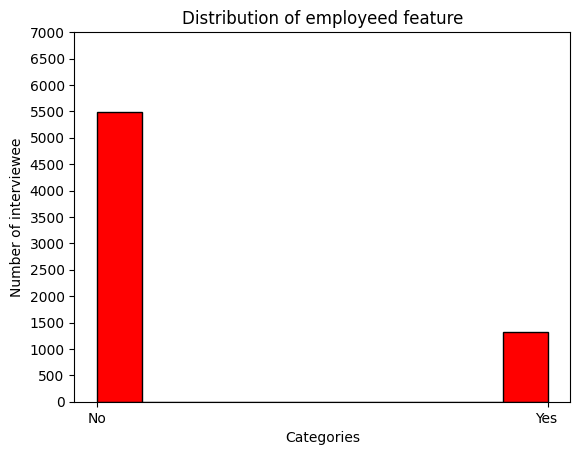

In [ ]:
plt.hist(emp, color='red', edgecolor='black')
plt.title('Distribution of employeed feature')
plt.yticks(np.arange(0, 7001, 500))
plt.xlabel('Categories')
plt.ylabel('Number of interviewee')

In [ ]:
percentage_of_yes = (len(emp[emp=='Yes ']) / len(emp)) * 100
print(f"{round(percentage_of_yes, 2)}% of participants are not employed which are: {len(emp[emp=='Yes '])}")

19.47% of participants are not employed which are: 1326


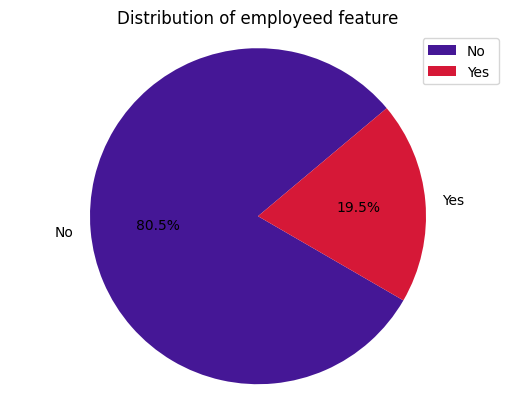

In [ ]:
counter = Counter(emp)

labels = list(counter.keys())
count = list(counter.values())

plt.pie(count, labels=labels, colors=['#451796', "#d61837"], autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.legend()
plt.title('Distribution of employeed feature')
plt.show()

`Just 19.5% of intervieews are employeed which means that over 80% of intervieews are not employeed.`

Let's see if we can find out the reason(s) for this top rate of unemployement using our dataset.

`Question 1:` Can EducationSatisfaction have an influence on employement ?

In [ ]:
temp_list = dataset[['employed', 'EducationSatisfaction']]
emp_no = temp_list[temp_list['employed'] == "No"]
emp_yes = temp_list[temp_list['employed'] == "Yes "]

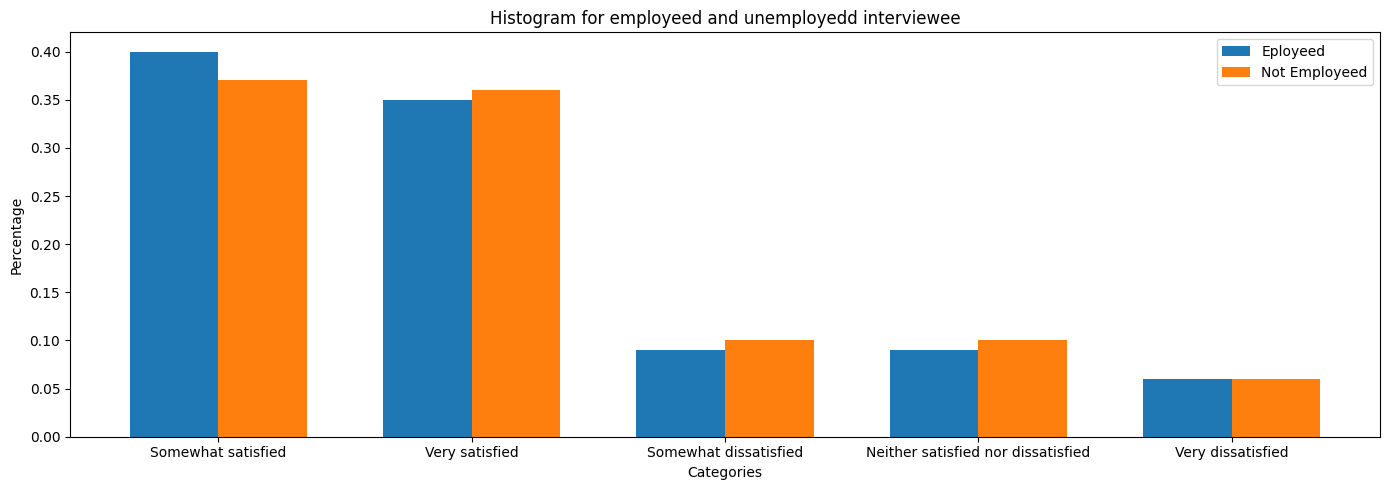

In [ ]:
counter = Counter(emp_yes['EducationSatisfaction'])
counter2 = Counter(emp_no['EducationSatisfaction'])

count = list(counter.values())
count = [round(x / sum(count), 2) for x in count]

count2 = list(counter2.values())
count2 = [round(x / sum(count2), 2) for x in count2]

categories = list(counter2.keys())


bar_width = 0.35
index = np.arange(len(categories))
fig, ax = plt.subplots(figsize=(14, 5))

bar1 = ax.bar(index, count, bar_width, label='Eployeed')
bar2 = ax.bar(index + bar_width, count2, bar_width, label='Not Employeed')

ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Histogram for employeed and unemployedd interviewee')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)

ax.legend()
plt.tight_layout()
plt.show()

`There is no difference between employed and unemployed interviewees. So we can conclude that EducationSatisfaction doesn't have any influence on the reason for employment.`

`Question 2: ` Does DesireForResearch have any relation with employement?

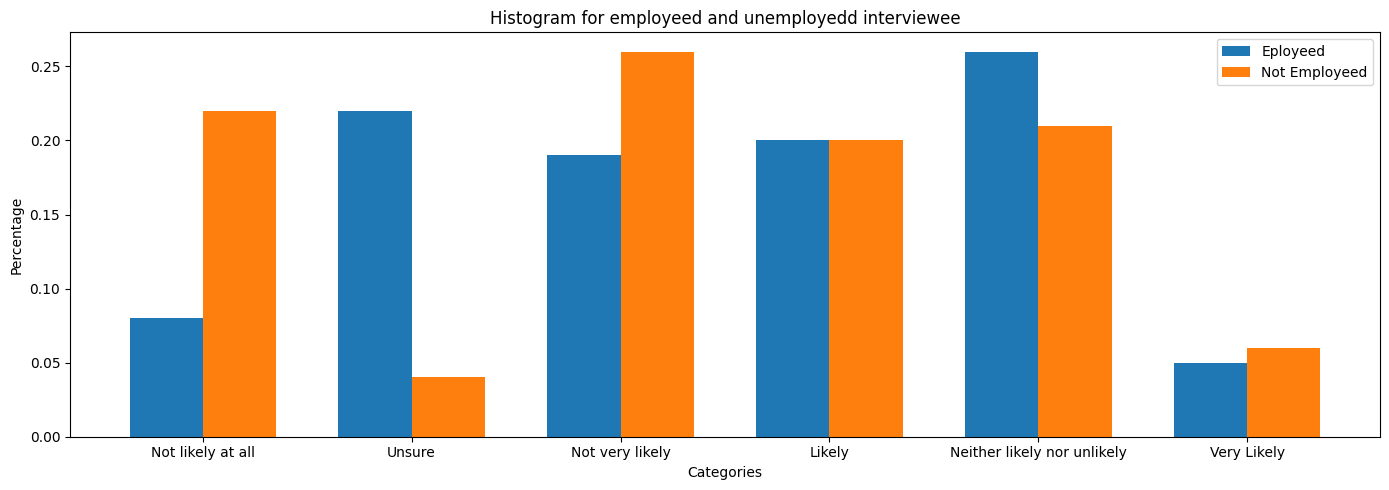

In [ ]:
temp_list = dataset[["employed","DesireForResearch"]]

emp_no = temp_list[temp_list['employed'] == "No"]
emp_yes = temp_list[temp_list['employed'] == "Yes "]


counter = Counter(emp_yes['DesireForResearch'])
counter2 = Counter(emp_no['DesireForResearch'])

count = list(counter.values())
count = [round(x / sum(count), 2) for x in count]

count2 = list(counter2.values())
count2 = [round(x / sum(count2), 2) for x in count2]

categories = list(counter2.keys())


bar_width = 0.35
index = np.arange(len(categories))
fig, ax = plt.subplots(figsize=(14, 5))

bar1 = ax.bar(index, count, bar_width, label='Eployeed')
bar2 = ax.bar(index + bar_width, count2, bar_width, label='Not Employeed')

ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Histogram for employeed and unemployedd interviewee')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)

ax.legend()
plt.tight_layout()
plt.show()

`I expect unemployed to select "Very Likely" or "Likely" because they don't have any job and they gonna choose academia.`

`Question 3:` Does EducationUsefulness have any relation with employement?

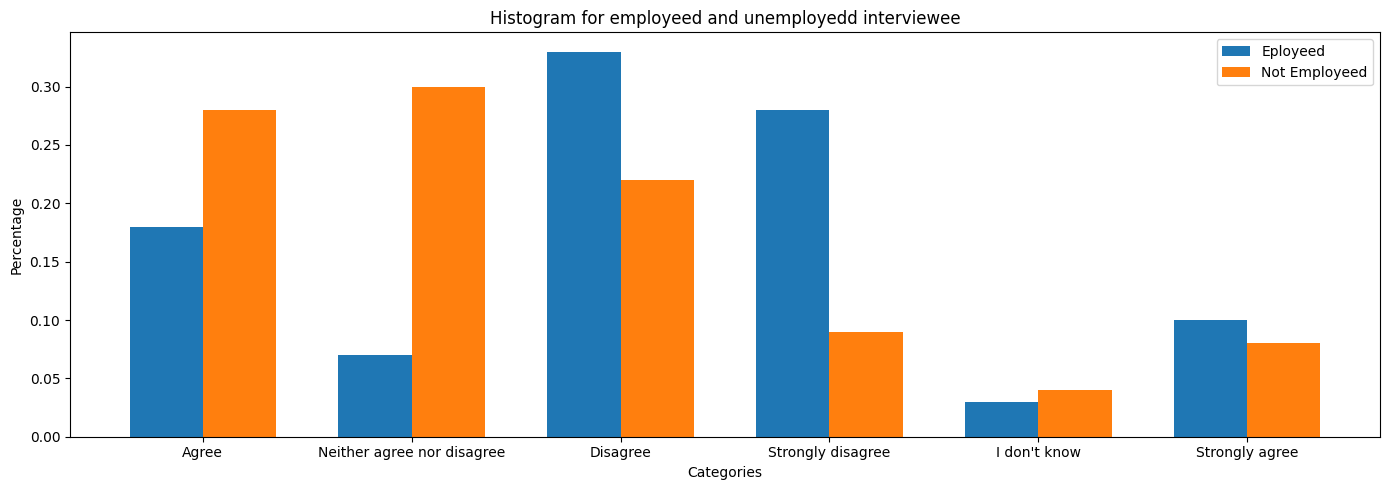

In [ ]:
temp_list = dataset[["employed","EducationUsefulness"]]

emp_no = temp_list[temp_list['employed'] == "No"]
emp_yes = temp_list[temp_list['employed'] == "Yes "]


counter = Counter(emp_yes['EducationUsefulness'])
counter2 = Counter(emp_no['EducationUsefulness'])

count = list(counter.values())
count = [round(x / sum(count), 2) for x in count]

count2 = list(counter2.values())
count2 = [round(x / sum(count2), 2) for x in count2]

categories = list(counter2.keys())


bar_width = 0.35
index = np.arange(len(categories))
fig, ax = plt.subplots(figsize=(14, 5))

bar1 = ax.bar(index, count, bar_width, label='Eployeed')
bar2 = ax.bar(index + bar_width, count2, bar_width, label='Not Employeed')

ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Histogram for employeed and unemployedd interviewee')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)

ax.legend()
plt.tight_layout()
plt.show()

- `Key observations:`
- `1) Employed students found education more meaningless than unemployed students.(See strongly disagree)`
- `2) Unemployed students are more uncertain about the usefulness of education.`

## Motivator

In [ ]:
motivator = dataset['Motivator']
motivator

,Motivator
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6807,"Another student, Postdoc, Other academic staff..."
6808,NaN
6809,"Supervisor, Other academic staff member"
6810,NaN


In [ ]:
print("Before and After dropping null values")
print(f"Before: {len(motivator)}, After: {len(motivator.dropna())}")
print(f"{100 - round(len(motivator.dropna()) / len(motivator)*100, 2)}% of data was missed")

Before and After dropping null values
Before: 6812, After: 1460
78.57% of data was missed


Text(0, 0.5, 'Number of interviewee')

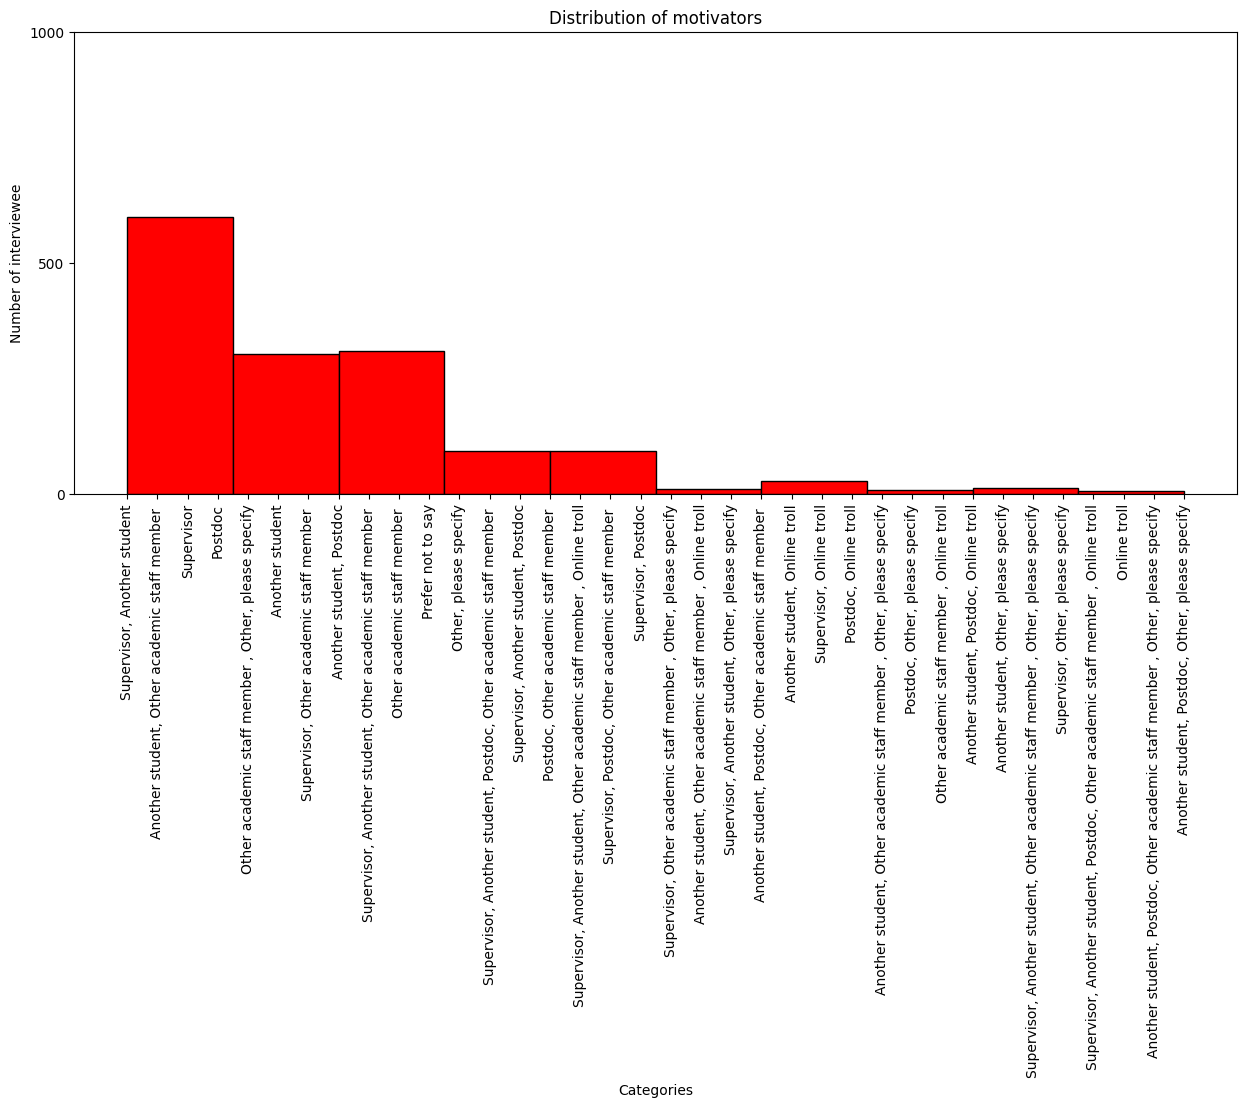

In [ ]:
plt.figure(figsize=(15, 6))
plt.hist(motivator.dropna(), color='red', edgecolor='black')
plt.title('Distribution of motivators')
plt.yticks(np.arange(0, 1001, 500))
plt.xticks(rotation=90)
plt.xlabel('Categories')
plt.ylabel('Number of interviewee')

This is terrible. let's clean the data

In [ ]:
map_motivators = {
    "Another student, Other academic staff member ": "Another Student",
    "Another student, Other academic staff member , Other, please specify": "Another Student",
    "Another student, Other, please specify": "Another Student",
    "Another student": "Another Student",
    "Another student, Postdoc": "Another Student",
    "Another student, Postdoc, Online troll": "Another Student",
    "Another student, Postdoc, Other, please specify": "Another Student",
    "Another student, Postdoc, Other academic staff member , Other, please specify": "Another Student",
    "Another student, Other academic staff member , Online troll": "Another Student",
    "Another student, Postdoc, Other academic staff member ": "Another Student",
    "Another student, Online troll": "Another Student",

    "Other academic staff member , Other, please specify": "Other academic staff member",
    "Other academic staff member , Online troll": "Other academic staff member",

    "Other, please specify": None,
    "Prefer not to say": None,

    "Postdoc, Other academic staff member ": "Postdoc",
    "Postdoc, Online troll": "Postdoc",
    "Postdoc, Other, please specify": "Postdoc",

    "Supervisor, Another student": "Supervisor",
    "Supervisor, Another student, Other academic staff member ": "Supervisor",
    "Supervisor, Another student, Other academic staff member , Online troll": "Supervisor",
    "Supervisor, Another student, Other academic staff member , Other, please specify": "Supervisor",
    "Supervisor, Another student, Other, please specify": "Supervisor",
    "Supervisor, Another student, Postdoc": "Supervisor",
    "Supervisor, Another student, Postdoc, Other academic staff member ": "Supervisor",
    "Supervisor, Another student, Postdoc, Other academic staff member , Online troll": "Supervisor",
    "Supervisor, Online troll": "Supervisor",
    "Supervisor, Other academic staff member ": "Supervisor",
    "Supervisor, Other academic staff member , Other, please specify": "Supervisor",
    "Supervisor, Other, please specify": "Supervisor",
    "Supervisor, Postdoc": "Supervisor",
    "Supervisor, Postdoc, Other academic staff member ": "Supervisor",
}

motivator = dataset['Motivator'].map(map_motivators)
motivator.dropna(inplace=True)
motivator

,Motivator
15,Supervisor
17,Another Student
55,Other academic staff member
67,Another Student
70,Another Student
...,...
6791,Supervisor
6797,Another Student
6799,Another Student
6807,Another Student


Text(0, 0.5, 'Number of interviewee')

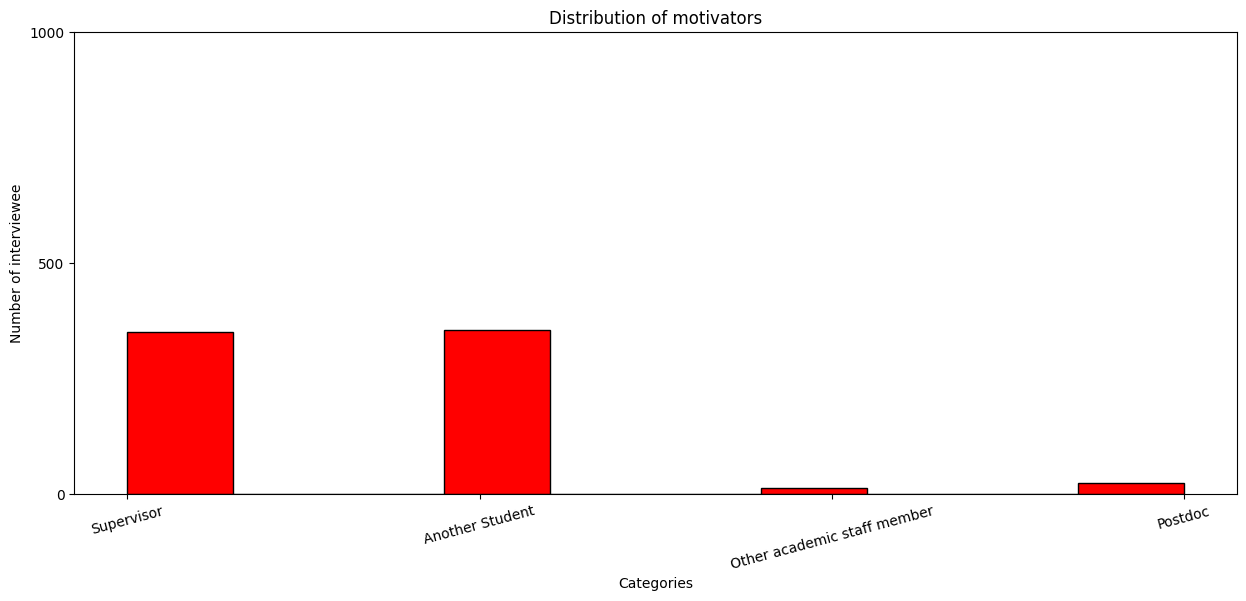

In [ ]:
plt.figure(figsize=(15, 6))
plt.hist(motivator.dropna(), color='red', edgecolor='black')
plt.title('Distribution of motivators')
plt.yticks(np.arange(0, 1001, 500))
plt.xticks(rotation=15)
plt.xlabel('Categories')
plt.ylabel('Number of interviewee')

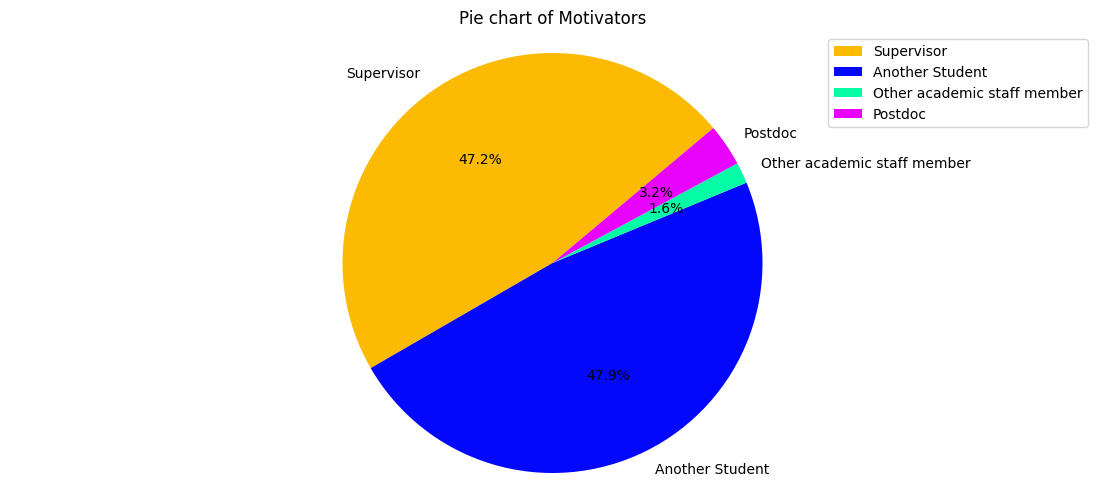

In [ ]:
counter = Counter(motivator)

labels = list(counter.keys())
count = list(counter.values())
plt.figure(figsize=(14,6))
plt.pie(count, labels=labels, colors=['#fcba03', "#0307fc", "#03fca5", "#e703fc"], autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.legend()
plt.title('Pie chart of Motivators')
plt.show()

`Friends influences are really important.` :)))))

## DepressionExperience

In [ ]:
dep = dataset['DepressionExperience']
dep

,DepressionExperience
0,No
1,No
2,No
3,No
4,No
...,...
6807,Yes
6808,No
6809,Yes
6810,No


In [ ]:
print(f'Before removing null values: {dep.shape[0]}, After removing NULL values" {dep.dropna().shape[0]}')
print(f"There are {dep.shape[0] - dep.dropna().shape[0]} NULL values in this feature")
print(f"{round(100 - (dep.dropna().shape[0] / dep.shape[0]*100), 2)}% of this feature is Null")

Before removing null values: 6812, After removing NULL values" 6804
There are 8 NULL values in this feature
0.12% of this feature is Null


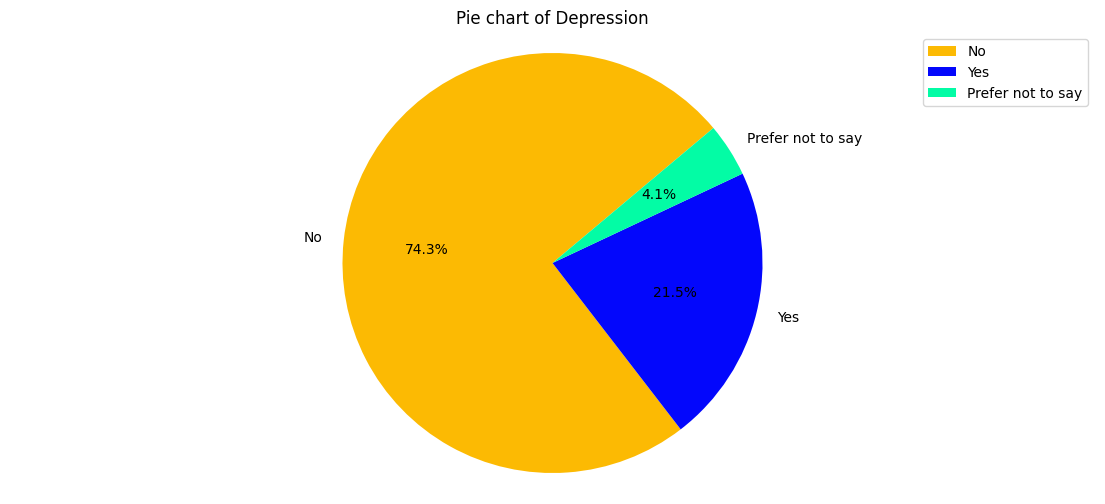

In [ ]:
counter = Counter(dep.dropna())

labels = list(counter.keys())
count = list(counter.values())
plt.figure(figsize=(14,6))
plt.pie(count, labels=labels, colors=['#fcba03', "#0307fc", "#03fca5", "#e703fc"], autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.legend()
plt.title('Pie chart of Depression')
plt.show()

Let's see if we can find a reason for depression

`Question 1:` Can employment status be the reason for depression?

In [ ]:
temp_list = dataset[dataset['DepressionExperience'] == 'Yes']

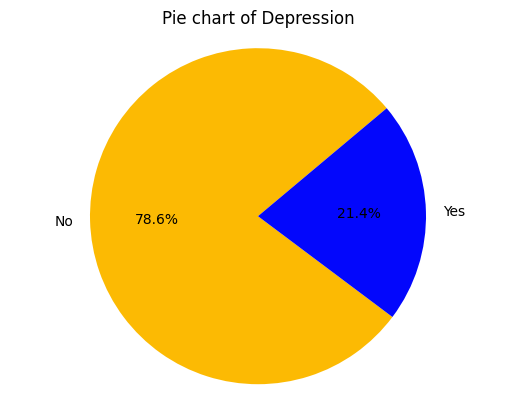

In [ ]:
dep_yes = temp_list[["DepressionExperience", "employed"]]

counter = Counter(dep_yes["employed"])

labels = list(counter.keys())
count = list(counter.values())

plt.pie(count, labels=labels, colors=['#fcba03', "#0307fc", "#03fca5", "#e703fc"], autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('Pie chart of Depression')
plt.show()

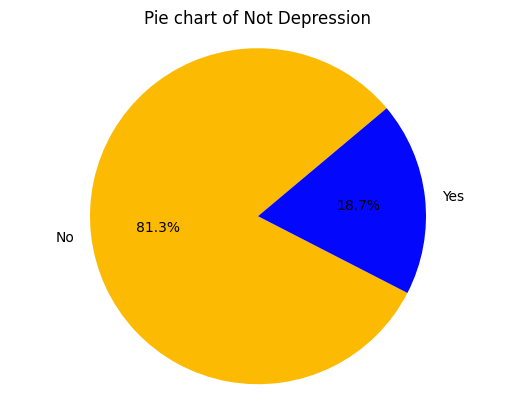

In [ ]:
temp_list = dataset[dataset['DepressionExperience'] == 'No']
dep_yes = temp_list[["DepressionExperience", "employed"]]

counter = Counter(dep_yes["employed"])

labels = list(counter.keys())
count = list(counter.values())

plt.pie(count, labels=labels, colors=['#fcba03', "#0307fc", "#03fca5", "#e703fc"], autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('Pie chart of Not Depression')
plt.show()

`Both depressed and not depressed students have the same percentage for employement so it can't be a good reason`

`Question 2:`  Is gender plays role in depression?

In [ ]:
counter

Counter({'Yes': 582})

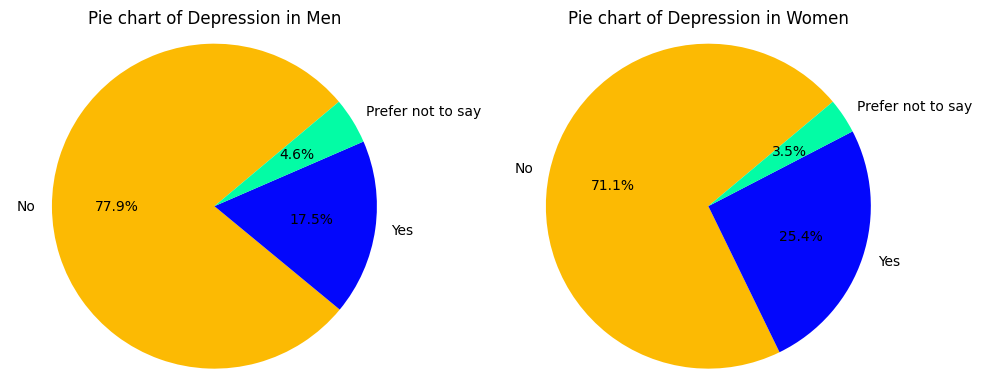

In [ ]:
temp_list = dataset[["Gender", "DepressionExperience"]]
temp_list = temp_list.dropna()

male = temp_list[temp_list['Gender'] == "Male"]
female = temp_list[temp_list['Gender'] == "Female"]


counter = Counter(male["DepressionExperience"])
counter2 = Counter(female["DepressionExperience"])


labels = list(counter.keys())
count = list(counter.values())
count2 = list(counter2.values())

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))

ax1.pie(count, labels=labels, colors=['#fcba03', "#0307fc", "#03fca5", "#e703fc"], autopct='%1.1f%%', startangle=40)
ax1.axis('equal')
ax1.set_title('Pie chart of Depression in Men')

ax2.pie(count2, labels=labels, colors=['#fcba03', "#0307fc", "#03fca5", "#e703fc"], autopct='%1.1f%%', startangle=40)
ax2.axis('equal')
ax2.set_title('Pie chart of Depression in Women')

plt.tight_layout()
plt.show()

# Dimension Reduction(PCA and t-SNE)

In [ ]:
temp_table = dataset[['CareerSatisfaction', 'EducationSatisfaction', 'StudyHours', 'Gender', 'ResidenceRegion', 'MontlyExpences', 'Age', 'EducationUsefulness']]
temp_table

,CareerSatisfaction,EducationSatisfaction,StudyHours,Gender,ResidenceRegion,MontlyExpences,Age,EducationUsefulness
0,3.0,Somewhat satisfied,57.0,Female,Mexico,6500,28.0,Agree
1,5.0,Somewhat satisfied,63.0,Male,United States,2000,25.0,Neither agree nor disagree
2,5.0,Very satisfied,67.0,Male,United States,1500,26.0,Agree
3,2.0,Somewhat satisfied,74.0,Male,United States,1500,28.0,Agree
4,5.0,Somewhat dissatisfied,57.0,Male,United States,6000,30.0,Disagree
...,...,...,...,...,...,...,...,...
6807,1.0,Somewhat dissatisfied,55.0,Female,United States,2500,33.0,Strongly disagree
6808,5.0,Very satisfied,34.0,Female,United States,8500,29.0,Agree
6809,1.0,Neither satisfied nor dissatisfied,54.0,Male,Germany,2000,32.0,Strongly disagree
6810,5.0,Very satisfied,72.0,Male,United States,8000,34.0,Neither agree nor disagree


`CareerSatisfaction`, `StudyHours`, `MontlyExpences` and `Age` are neumerical so we don't need to convert them to integers or floats

In [ ]:
null_rows = temp_table[temp_table.isnull().any(axis=1)]
null_rows

,CareerSatisfaction,EducationSatisfaction,StudyHours,Gender,ResidenceRegion,MontlyExpences,Age,EducationUsefulness
30,NaN,Somewhat satisfied,65.0,Male,Germany,1000,19.0,Agree
66,NaN,Very satisfied,57.0,Female,Brazil,4000,31.0,Agree
72,7.0,Very satisfied,41.0,Female,Germany,4000,NaN,I don't know
76,NaN,Very satisfied,56.0,Prefer not to say,United Kingdom,2000,26.0,Neither agree nor disagree
108,NaN,Neither satisfied nor dissatisfied,56.0,Male,United Kingdom,3500,24.0,Disagree
...,...,...,...,...,...,...,...,...
6670,2.0,Very satisfied,75.0,Male,United States,2500,NaN,Strongly agree
6721,NaN,Neither satisfied nor dissatisfied,0.0,Male,Germany,3000,36.0,Neither agree nor disagree
6728,NaN,Very satisfied,59.0,Male,Switzerland,7500,25.0,Neither agree nor disagree
6748,NaN,Very satisfied,58.0,Male,Germany,3000,18.0,Neither agree nor disagree


We descided to delete the nulls

`We will use one-hot encoding for Gender, ResidenceRegion and EducationUsefulness. We won't use label encoding becuase there are no ordering between genders.`

In [ ]:
df_encoded  = pd.get_dummies(temp_table, columns=['Gender'], drop_first=True, dtype=int)
df_encoded  = pd.get_dummies(df_encoded, columns=['ResidenceRegion'], drop_first=True, dtype=int)
df_encoded  = pd.get_dummies(df_encoded, columns=['EducationUsefulness'], drop_first=True, dtype=int)

label_encoder_map = {
    'Very satisfied': 5,
    'Somewhat satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Somewhat dissatisfied': 2,
    'Very dissatisfied': 1
}

df_encoded['EducationSatisfaction'] = df_encoded['EducationSatisfaction'].map(label_encoder_map)


df_encoded

,CareerSatisfaction,EducationSatisfaction,StudyHours,MontlyExpences,Age,Gender_Gender queer / Non binary,Gender_Male,Gender_Prefer not to say,ResidenceRegion_Algeria,ResidenceRegion_Antigua and Barbuda,...,ResidenceRegion_Uruguay,ResidenceRegion_Uzbekistan,ResidenceRegion_Venezuela,ResidenceRegion_Vietnam,ResidenceRegion_Zimbabwe,EducationUsefulness_Disagree,EducationUsefulness_I don't know,EducationUsefulness_Neither agree nor disagree,EducationUsefulness_Strongly agree,EducationUsefulness_Strongly disagree
0,3.0,4,57.0,6500,28.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,4,63.0,2000,25.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5.0,5,67.0,1500,26.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,4,74.0,1500,28.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,2,57.0,6000,30.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1.0,2,55.0,2500,33.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6808,5.0,5,34.0,8500,29.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6809,1.0,3,54.0,2000,32.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6810,5.0,5,72.0,8000,34.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now all the features are numeric and ready for applying dimensional reduction

In [ ]:
df_encoded.dropna(inplace=True)
pca = PCA(n_components=2)
pca_table = pca.fit_transform(df_encoded)

tsne = TSNE(n_components=2, random_state=42)
tsne_table = tsne.fit_transform(df_encoded)

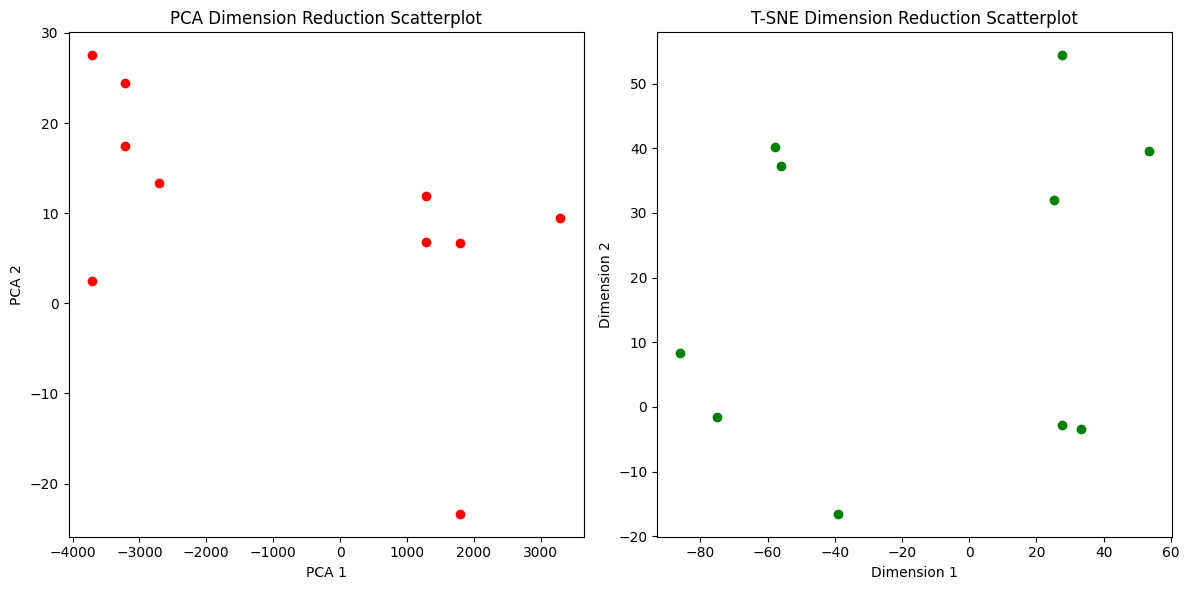

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(pca_table[:10,0],pca_table[:10,1], color= 'red')
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_title('PCA Dimension Reduction Scatterplot')


ax2.scatter(tsne_table[:10,0],tsne_table[:10,1], color= 'green')
ax2.set_xlabel('Dimension 1')
ax2.set_ylabel('Dimension 2')
ax2.set_title('T-SNE Dimension Reduction Scatterplot')

plt.tight_layout()
plt.show()

`PCA and t-SNE are highlighting different aspects of data. PCA is showing the linear structure, while t-SNE is revealing more intricate, non-linear relationships.`
 - From Microsoft Copilot

# Correlation of a feature

We did this before for all the numeric features. But let's focus on Age for this part.

In [ ]:
temp_list = dataset[['Age', 'MontlyExpences', 'StudyHours', 'CareerSatisfaction']]
temp_list

,Age,MontlyExpences,StudyHours,CareerSatisfaction
0,28.0,6500,57.0,3.0
1,25.0,2000,63.0,5.0
2,26.0,1500,67.0,5.0
3,28.0,1500,74.0,2.0
4,30.0,6000,57.0,5.0
...,...,...,...,...
6807,33.0,2500,55.0,1.0
6808,29.0,8500,34.0,5.0
6809,32.0,2000,54.0,1.0
6810,34.0,8000,72.0,5.0


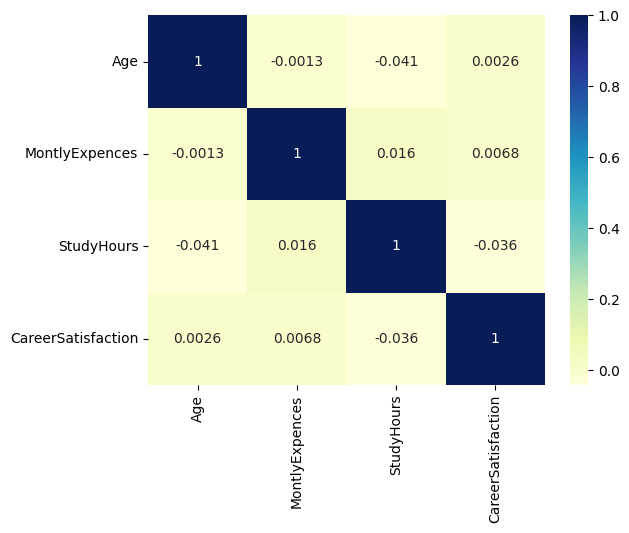

In [ ]:
sns.heatmap(temp_list.corr(), annot=True, cmap="YlGnBu")
plt.show()

`There is no meaningful correlation between age and the other three features(CareerSatisfaction, StudyHours, MonthlyExpences)`

# Study Hours based on Regions

In [ ]:
temp_list = dataset.groupby('ResidenceRegion')['StudyHours'].mean()
temp_list = temp_list.sort_values(ascending=False)
temp_list

,StudyHours
ResidenceRegion,
Mongolia,100.000000
Tanzania,77.333333
Mauritius,70.000000
Antigua and Barbuda,70.000000
Ethiopia,67.800000
...,...
Bulgaria,15.000000
Jordan,14.000000
Suriname,13.000000


`This is unfair because some countries have fewer than 20 participants. So let's consider a filter to remove countries with fewer than 20 participants.`

In [ ]:
region_counts = dataset['ResidenceRegion'].value_counts()
valid_regions = region_counts[region_counts >= 20].index
filtered_dataset = dataset[dataset['ResidenceRegion'].isin(valid_regions)]
temp_list = filtered_dataset.groupby('ResidenceRegion')['StudyHours'].mean()
temp_list = temp_list.sort_values(ascending=False)
temp_list.head(5)

,StudyHours
ResidenceRegion,
South Korea,67.773810
Singapore,58.984127
Malaysia,57.083333
India,56.850379
"Other, please specify",56.640000


- The top 3 contries are:
    - `1) South Korea`
    - `2) Singapore`
    - `3) Malaysia`

    All of them from Asia

# The most common reasons for Study Abroad

In [ ]:
temp_list = dataset[['ReasonForStudyAbroad', 'Immigrant']]
temp_list = temp_list[temp_list['Immigrant'] == 'Yes']
temp_list['ReasonForStudyAbroad'].unique()

array([nan], dtype=object)

`All the students that migrated didn't fill the Reason for study abroad.`

In [ ]:
temp_list = dataset['ReasonForStudyAbroad'].value_counts()
temp_list = temp_list.sort_values(ascending=False)
temp_list.head(5)

,count
ReasonForStudyAbroad,
Lack of funding opportunities in my home country,114
Lack of quality PhD programmes in my home country,107
Chance to pursue a specific research question,99
To experience another culture,88
To study at a specific university,71


 - The 3 top most reasons are(amoung whose didn't migrated):
    - `1) Lack of funding opportunities in my home country`
    - `2) Lack of quality PhD programmes in my home country`
    - `3) Chance to pursue a specific research question`